@Author:Vijay Kumar M N<br>
@Date: 2024-11-12<br>
@Last Modified by:Vijay Kumar M N<br>
@Last Modified: 2024-11-12<br>
@Title :Python Program for multiple regression for weather data<br>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
df = pd.read_csv('C:/Users/Admin/Downloads/weatherHistory.csv')
print(df.info())
#print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
                  Formatted Date        Summary Precip Type  Tem

In [51]:
#checking for null values
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [52]:
#removing unwanted columns
df=df.drop(['Loud Cover','Precip Type','Formatted Date','Summary','Daily Summary'],axis=1)


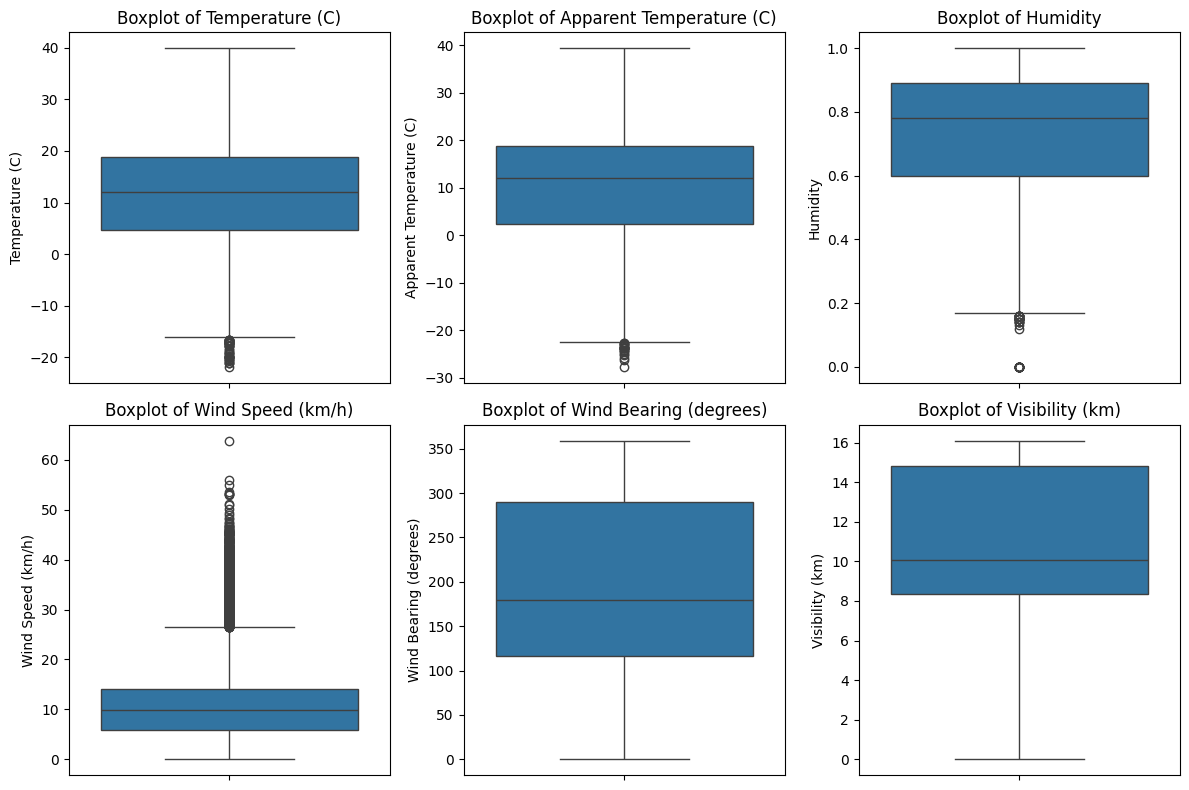

In [53]:
#to check wheather the outliers present or not
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude target column
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [54]:
#removing the outliers
#Calculate IQR and filter out outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Keep only the rows within the IQR bounds
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.head(1))



Temperature (C)              14.150000
Apparent Temperature (C)     16.527778
Humidity                      0.290000
Wind Speed (km/h)             8.307600
Wind Bearing (degrees)      174.000000
Visibility (km)               6.472200
Pressure (millibars)          9.190000
dtype: float64
   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                   251.0          15.8263               1015.13  


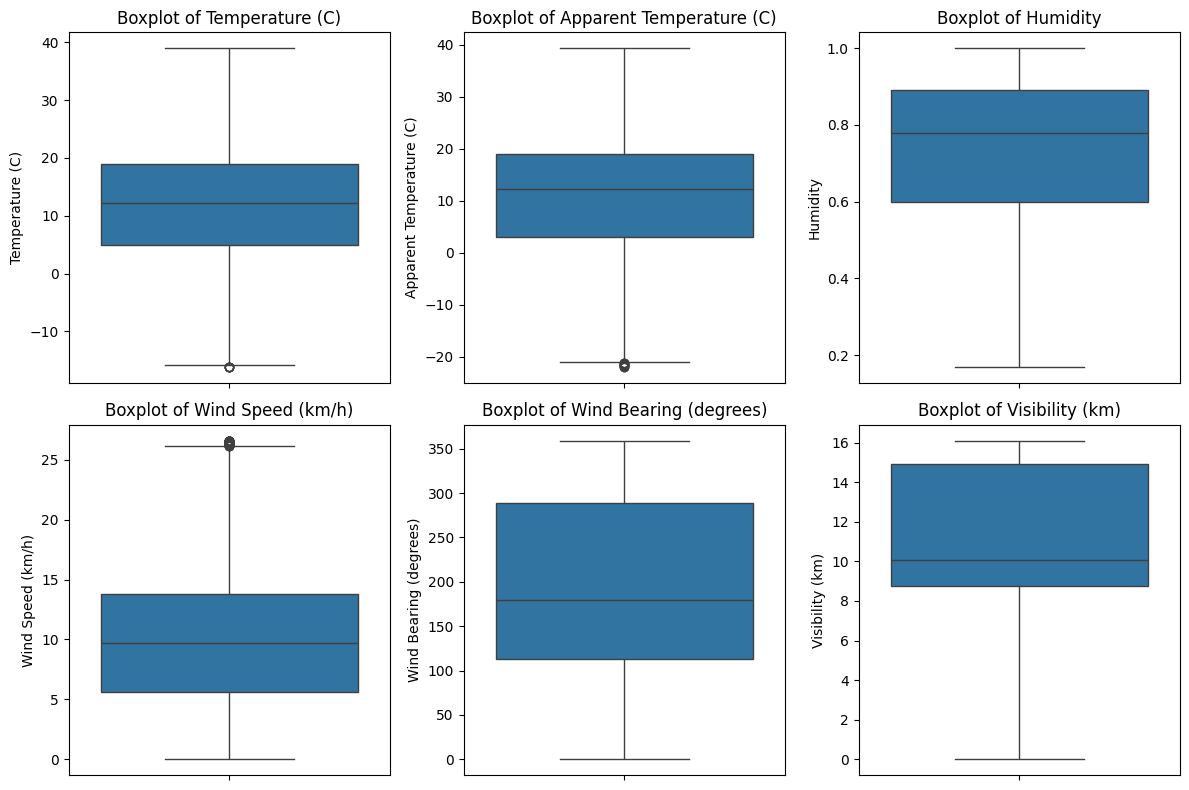

In [55]:
#to check wheather the outliers present or not
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude target column
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [56]:
x_data = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
y_data =df[['Apparent Temperature (C)']]
y_data

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


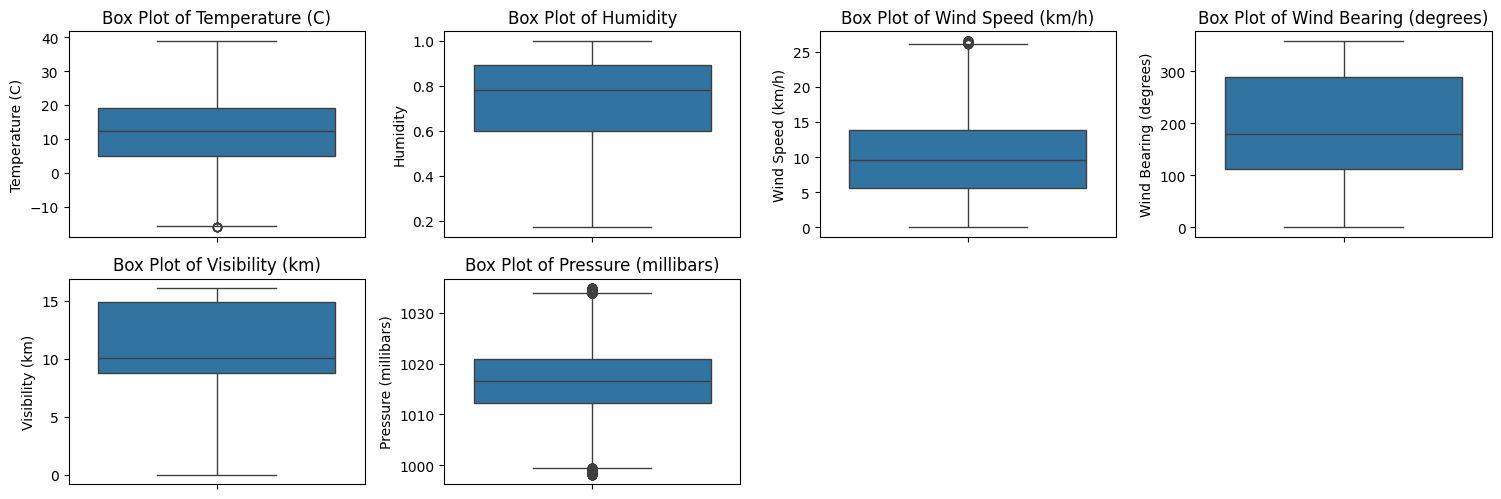

In [57]:
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(x_data.columns):
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(y=x_data[column])  
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Correlation Between Data

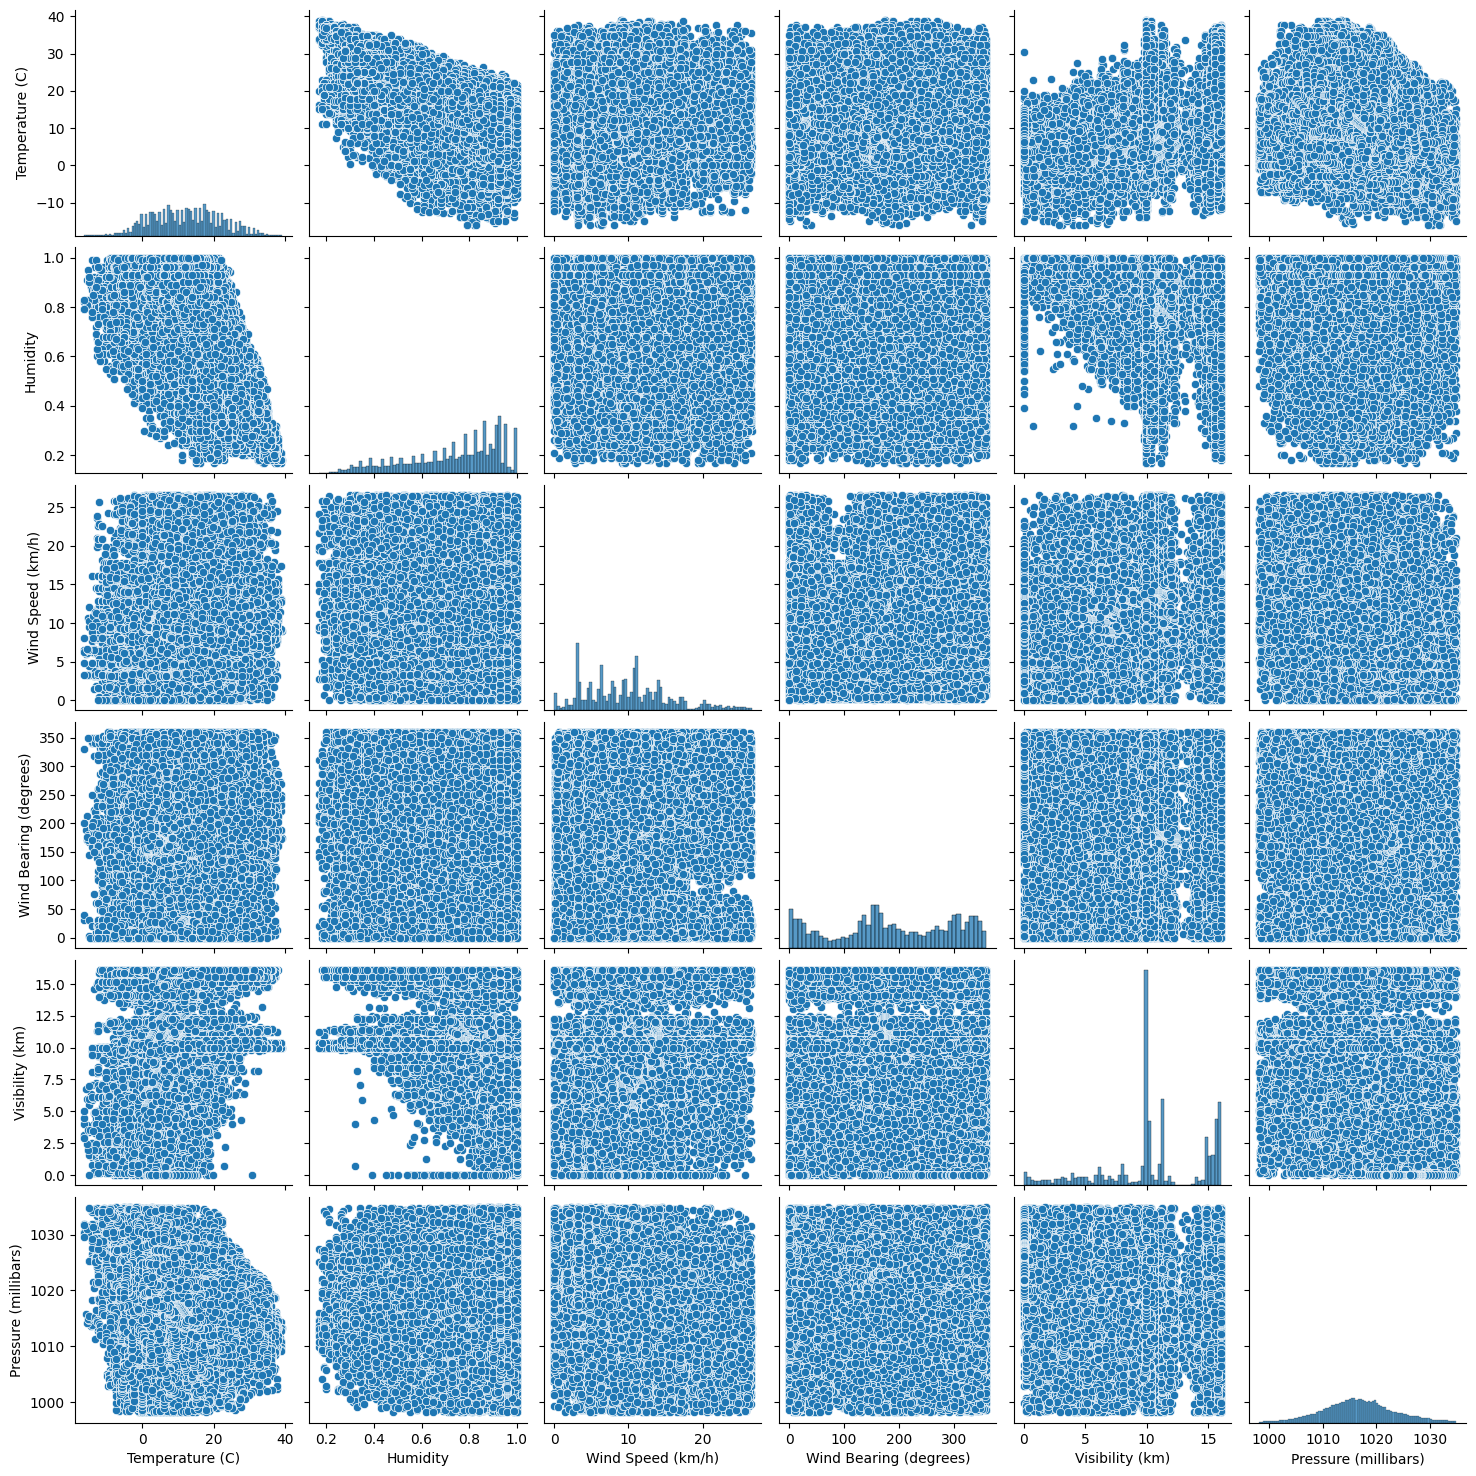

In [58]:
sns.pairplot(x_data)
plt.show()

In [59]:
correlation_matrix = x_data.corr()

correlation_matrix

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,-0.647374,0.019723,0.025565,0.387889,-0.304394
Humidity,-0.647374,1.000000,-0.223757,0.009694,-0.364142,0.034969
Wind Speed (km/h),0.019723,-0.223757,1.000000,0.080391,0.092833,-0.196432
Wind Bearing (degrees),0.025565,0.009694,0.080391,1.000000,0.050003,-0.073627
Visibility (km),0.387889,-0.364142,0.092833,0.050003,1.000000,-0.147749
Pressure (millibars),-0.304394,0.034969,-0.196432,-0.073627,-0.147749,1.000000


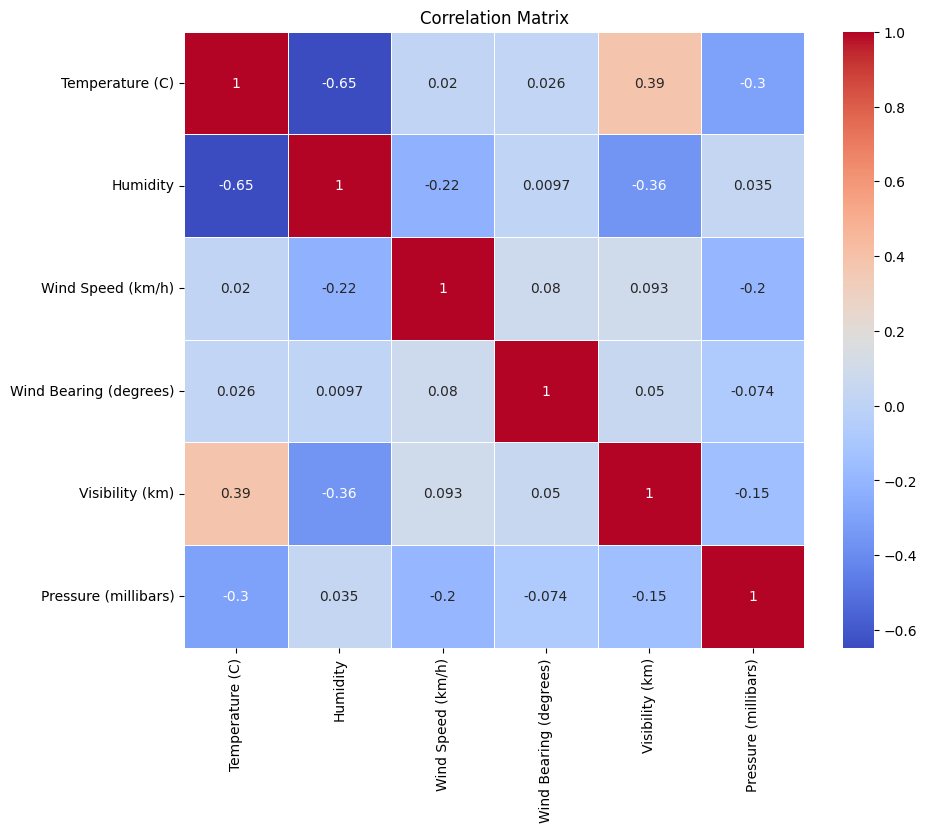

In [60]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size = 0.2,random_state = 42)


In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_test_pred = model.predict(x_test)
print("X_test shape",x_test.shape)
print(y_test_pred.shape)

X_test shape (17853, 6)
(17853, 1)


In [64]:
#calculating the values
mse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)
print("Mean Square Error", mse)
print("R Square", r2)

Mean Square Error 1.0272014908336164
R Square 0.9907863707876116


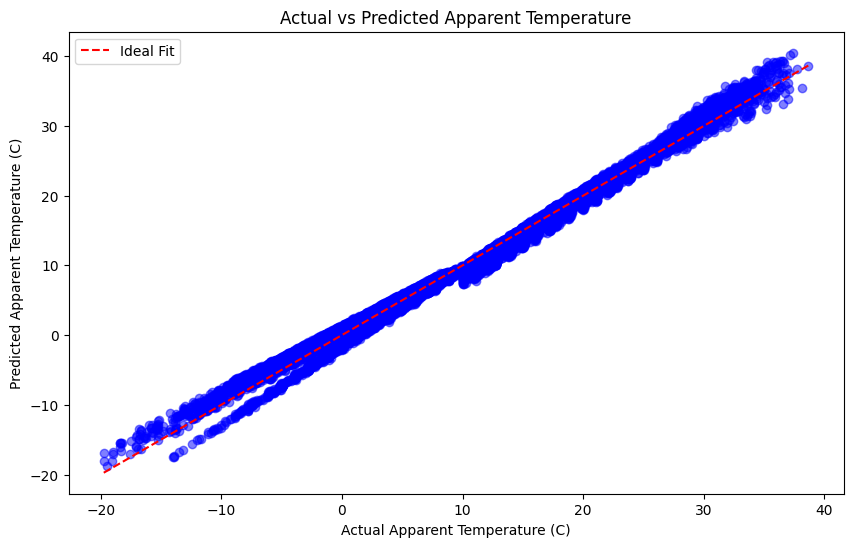

In [65]:
#visualizing
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.title('Actual vs Predicted Apparent Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()